In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset = pd.read_csv('StudentsPerformance.csv')

In [3]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,NaN,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [4]:
# Missing values

In [6]:
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     5
reading score                  5
writing score                  6
dtype: int64

In [11]:
mathAvg = dataset['math score'].mean()
dataset['math score'].fillna(mathAvg, inplace=True)

In [12]:
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  5
writing score                  6
dtype: int64

In [14]:
dataset.dropna(inplace=True)

In [15]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
6,female,group B,some college,standard,completed,88.0,95.0,92.0


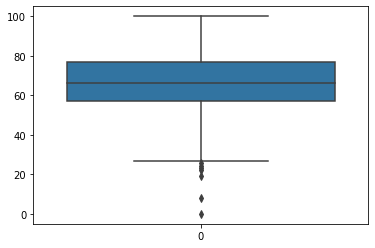

In [22]:
sns.boxplot(data=dataset['math score'])
plt.show()

In [25]:
uperPer, lowerPer = np.percentile(dataset['math score'],75), np.percentile(dataset['math score'],25)

In [26]:
uperPer

77.0

In [27]:
lowerPer

57.0

In [29]:
Q3, Q1 = np.percentile(dataset['math score'], [75, 25])

In [31]:
Q1

57.0

In [32]:
IQR = uperPer-lowerPer

In [33]:
IQR

20.0

In [34]:
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR

In [35]:
UL

107.0

In [36]:
LL

27.0

In [40]:
dataset['math score'] = np.where(dataset['math score']>UL,
         UL, 
         np.where(dataset['math score']<LL,
         LL,
        dataset['math score'])
        )

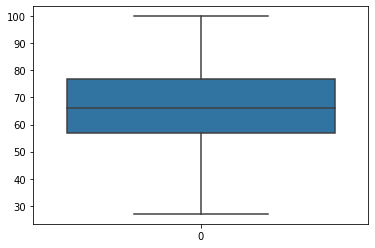

In [41]:
sns.boxplot(data=dataset['math score'])
plt.show()

In [44]:
np.log10(dataset['math score'])

0      1.857332
1      1.838849
2      1.954243
4      1.880814
6      1.944483
         ...   
995    1.944483
996    1.792392
997    1.770852
998    1.832509
999    1.886491
Name: math score, Length: 989, dtype: float64

In [57]:
data = pd.get_dummies(dataset)

In [52]:
from sklearn.preprocessing import StandardScaler

In [58]:
scScale = StandardScaler()
scScale.fit_transform(data)

array([[ 0.38628737,  0.19224425,  0.39011539, ...,  0.73845277,
        -0.74828932,  0.74828932],
       [ 0.1835872 ,  1.42685181,  1.31440315, ...,  0.73845277,
         1.33638149, -1.33638149],
       [ 1.60248837,  1.76979836,  1.64450592, ...,  0.73845277,
        -0.74828932,  0.74828932],
       ...,
       [-0.49208003,  0.12365494, -0.2040696 , ..., -1.35418274,
         1.33638149, -1.33638149],
       [ 0.11602048,  0.60378011,  0.58817705, ...,  0.73845277,
         1.33638149, -1.33638149],
       [ 0.72412098,  1.15249458,  1.18236204, ..., -1.35418274,
        -0.74828932,  0.74828932]])